# Classifying newswire: a multiclass classification example
## Reuters Dataset

In [0]:
from keras.datasets import reuters

In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [0]:
print("Length of train data: ", len(train_data))
print("Length of test data: ", len(test_data))
print("Sample of train data (10): ", train_data[10])

Length of train data:  8982
Length of test data:  2246
Sample of train data (10):  [1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])
print("Decoded newswire of sample (10): ", decoded_newswire)
print("Label of sample (10): ", train_labels[10])

Decoded newswire of sample (10):  ? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3
Label of sample (10):  3


In [0]:
import numpy as np

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

In [0]:
one_hot_train_labels1 = to_one_hot(train_labels)
one_hot_test_labels1 = to_one_hot(test_labels)

In [0]:
# or you can just import this:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
assert(one_hot_train_labels1.all() == one_hot_train_labels.all()) # call error if not equal

In [0]:
from keras import models, layers, optimizers, losses, metrics

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.categorical_crossentropy,
              metrics=[metrics.categorical_accuracy])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
EPOCHS = 20

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

W0819 13:47:40.853844 139766682011520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0819 13:47:41.144804 139766682011520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 222us/step - loss: 2.6102 - categorical_accuracy: 0.5287 - val_loss: 1.6778 - val_categorical_accuracy: 0.6340
Epoch 2/20
7982/7982 [==============================] - 1s 169us/step - loss: 1.3994 - categorical_accuracy: 0.7035 - val_loss: 1.2831 - val_categorical_accuracy: 0.7150
Epoch 3/20
7982/7982 [==============================] - 1s 169us/step - loss: 1.0562 - categorical_accuracy: 0.7676 - val_loss: 1.1193 - val_categorical_accuracy: 0.7550
Epoch 4/20
7982/7982 [==============================] - 1s 167us/step - loss: 0.8303 - categorical_accuracy: 0.8211 - val_loss: 1.0192 - val_categorical_accuracy: 0.7890
Epoch 5/20
7982/7982 [==============================] - 1s 166us/step - loss: 0.6645 - categorical_accuracy: 0.8602 - val_loss: 0.9665 - val_categorical_accuracy: 0.8000
Epoch 6/20
7982/7982 [==============================] - 1s 165us/step - loss: 0.5311 - categorical_acc

In [0]:
import matplotlib.pyplot as plt

In [0]:
history_dict = history.history
print("History Keys: ", history_dict.keys())

History Keys:  dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])


In [0]:
training_loss = history_dict['loss']
val_loss = history_dict['val_loss']
training_acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
epochs = range(1, len(training_loss) + 1)

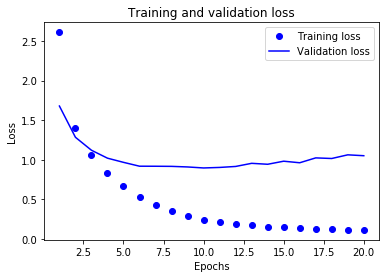

In [0]:
plt.plot(epochs, training_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

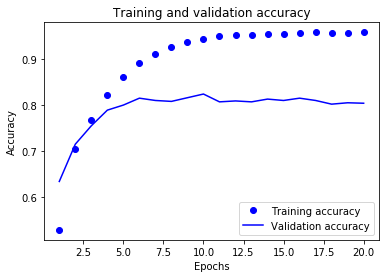

In [0]:
plt.plot(epochs, training_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The model starts to ***overfit*** at epoch 10, lets just train up to **9 epochs**

In [0]:
model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))
model2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.categorical_crossentropy,
              metrics=[metrics.categorical_accuracy])

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [0]:
NEW_EPOCHS = 9

In [0]:
history = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=NEW_EPOCHS,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 197us/step - loss: 2.5398 - categorical_accuracy: 0.5226 - val_loss: 1.6733 - val_categorical_accuracy: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 159us/step - loss: 1.3712 - categorical_accuracy: 0.7121 - val_loss: 1.2758 - val_categorical_accuracy: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 158us/step - loss: 1.0136 - categorical_accuracy: 0.7781 - val_loss: 1.1303 - val_categorical_accuracy: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 158us/step - loss: 0.7976 - categorical_accuracy: 0.8251 - val_loss: 1.0539 - val_categorical_accuracy: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 158us/step - loss: 0.6393 - categorical_accuracy: 0.8624 - val_loss: 0.9754 - val_categorical_accuracy: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 156us/step - loss: 0.5124 - categorical_accuracy:

In [0]:
results2 = model2.evaluate(x_test, one_hot_test_labels)
print("Results(2): ", results2)

2246/2246 [==============================] - 0s 117us/step
Results(2):  [1.0224983157160445, 0.7756010686194165]


In [0]:
import copy

In [0]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

In [0]:
predictions = model.predict(x_test)

In [0]:
print("Prediction shape (0): ", predictions[0].shape)
print("Sum of probability of prediction shape (0): ", np.sum(predictions[0]))
print("Predicted class of sample 0: ", np.argmax(predictions[0]))

Prediction shape (0):  (46,)
Sum of probability of prediction shape (0):  0.99999994
Predicted class of sample 0:  3


## A different way to handle labels and loss
When the labels are just integet, the loss should not be categorical_crossentropy but the **sparse_categorical_crossentropy**.

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [0]:
model3 = models.Sequential()
model3.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(46, activation='softmax'))
model3.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [0]:
history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=NEW_EPOCHS,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 216us/step - loss: 2.5481 - acc: 0.5005 - val_loss: 1.6980 - val_acc: 0.6390
Epoch 2/9
7982/7982 [==============================] - 1s 157us/step - loss: 1.4038 - acc: 0.7040 - val_loss: 1.2912 - val_acc: 0.7050
Epoch 3/9
7982/7982 [==============================] - 1s 146us/step - loss: 1.0448 - acc: 0.7702 - val_loss: 1.1351 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 145us/step - loss: 0.8224 - acc: 0.8226 - val_loss: 1.0312 - val_acc: 0.7800
Epoch 5/9
7982/7982 [==============================] - 1s 146us/step - loss: 0.6538 - acc: 0.8578 - val_loss: 0.9617 - val_acc: 0.7990
Epoch 6/9
7982/7982 [==============================] - 1s 152us/step - loss: 0.5193 - acc: 0.8939 - val_loss: 0.9233 - val_acc: 0.8000
Epoch 7/9
7982/7982 [==============================] - 1s 147us/step - loss: 0.4162 - acc: 0.9146 - val_loss: 0.9223 - val_acc: 0.7970
Epoch 8

In [0]:
results3 = model3.evaluate(x_test, y_test)
print("Results3: ", results3)

2246/2246 [==============================] - 0s 129us/step
Results3:  [0.9801060790370217, 0.7827248441674087]


## Experiment

1. Try using larger or smaller layer: 32 units, 128 units and so on.